# This script plots the HI mass against the Halo Mass 
## General plot for all galaxy types
## Plot separating the types of galaxies: centrals, satellites and orphans
### scatter plots for z=0, z=1
### Contour plots for z=0, z=1

In [1]:
# Code to plot the HI Mass as a function of Halo Mass (Mvir)
# First off, import the packages we need
import numpy as np  # work horse package for numerical work in python
import matplotlib.pyplot as plt  # plotting library
from dragons import meraxes, munge
import random
import sys
from Functions import *

#get gals, snaps, sims_props
snapshot_used = 250 # z = 0
gals, sim_props, snaplist = get_gal_catalogue(snapshot_used)

snaplist_index_used = list(snaplist[0]).index(snapshot_used)# convert to list and find the index of the snap we are using
redshift_used = snaplist[1][snaplist_index_used] # Get the redshift for corresponding snapshot
redshift_used = str(round(redshift_used, 1)) # round float to nearest whole int
# Take a random sample of gals (k = 10^4)
#gals_ran = Random_Sample_Gals(gals, 10000)
gals_ran = gals.sample(n=10000)
gals_ran
#gals_ran.shape


,HaloID,ID,Type,CentralGal,GhostFlag,Len,MaxLen,Spin,Mvir,Rvir,...,Pos_1,Pos_2,Vel_0,Vel_1,Vel_2,NewStars_0,NewStars_1,NewStars_2,NewStars_3,NewStars_4
532851,142279,1410002325982,2,484703,0,32,81,0.038082,0.605902,0.022207,...,71.657387,168.424026,358.464417,161.993744,-76.861214,1.825682e-06,1.882202e-06,1.941001e-06,2.002174e-06,2.065864e-06
932418,610769,1010000610769,0,932418,0,106,108,0.030920,2.007050,0.047347,...,108.381287,63.977253,163.097107,-71.118118,152.915863,9.575496e-05,1.318950e-04,6.498035e-05,2.242195e-05,2.596042e-05
76047,17669,1610001777843,2,4133,0,32,43,0.022604,0.605902,0.028924,...,48.386826,115.016380,-594.810852,752.929504,377.462952,2.140573e-06,2.241876e-06,2.349884e-06,2.465154e-06,2.588352e-06
1157883,787460,1390000787460,0,1157883,0,69,69,0.023857,1.306476,0.041034,...,106.870476,125.634735,50.168705,-858.197632,-484.790466,1.527879e-05,6.606750e-06,1.618310e-05,3.983971e-05,1.702865e-05
618057,151958,1950001524118,2,555357,0,33,41,0.051702,0.624836,0.031704,...,9.854878,65.514137,-98.569199,-115.299049,54.696281,2.973502e-07,2.968569e-07,2.963192e-07,2.957345e-07,2.951057e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012345,468416,1400000468416,0,1012345,0,178,178,0.084662,3.370328,0.056277,...,113.565269,114.628792,59.685658,-662.196655,-262.039551,1.037608e-04,1.117314e-04,1.459090e-04,1.506300e-04,1.381890e-04
830921,290962,2300001459876,2,804047,0,33,37,0.022834,0.624836,0.032061,...,71.968407,129.809387,-144.083099,74.180061,-448.395355,1.353892e-06,1.360491e-06,1.365946e-06,1.370095e-06,0.000000e+00
705145,235442,910001875528,0,705145,0,1200,1204,0.022454,22.721313,0.106314,...,128.001541,46.176731,449.010834,80.882591,-6.338318,2.152683e-03,2.448642e-03,3.095797e-03,4.138353e-03,4.285997e-03
324641,50724,1730001721817,2,252993,0,33,40,0.035810,0.624836,0.029855,...,161.903061,108.899323,-338.593597,-279.577454,-71.326981,1.303056e-06,1.315680e-06,1.328277e-06,1.340848e-06,1.353382e-06


In [2]:
snaplist[0]

array([100, 115, 134, 158, 173, 192, 216, 250])

In [3]:
# Log the masses 
HIMass = np.log10(gals_ran["HIMass"]*1e10)
print('HIMass: ', HIMass, 'no. items: ', HIMass.shape)
Mvir = np.log10(gals_ran["Mvir"]*1e10)
print('Mvir: ', Mvir, 'no. items: ', HIMass.shape)
Type = gals_ran["Type"]

HIMass:  532851     6.885652
932418     7.981261
76047      6.787765
1157883    7.438574
618057     7.076385
             ...   
1012345    8.764253
830921     7.047418
705145     8.760502
324641     7.132485
213905     7.360435
Name: HIMass, Length: 10000, dtype: float32 no. items:  (10000,)
Mvir:  532851      9.782402
932418     10.302558
76047       9.782402
1157883    10.116101
618057      9.795766
             ...    
1012345    10.527672
830921      9.795766
705145     11.356434
324641      9.795766
213905      9.833554
Name: Mvir, Length: 10000, dtype: float32 no. items:  (10000,)


/Users/jenkinsfamily/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


# SCATTER PLOT z=0
## All galaxies

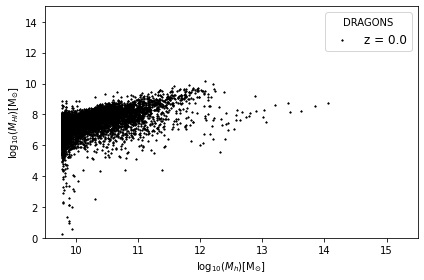

In [14]:
# Now plot the simulation for Cen, Sat and All and the Zwaan 2005 and Martin 2010 dataset on one fig
fig, ax = plt.subplots(1, 1)

label_z = ("z = " + redshift_used)
x = Mvir
y = HIMass
plot = ax.scatter(x, y, color= "black", marker= "*", s=2, label=label_z)  

ax.set_xlabel(r"$\log_{10}(M_{h}) [{\rm M_{\odot}}]$")
ax.set_ylabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
ax.set_ylim([0,15])
ax.set_xlim([9.5,15.5])
# Add the legend
plt.legend(title=("DRAGONS"),
           loc='upper right',
           ncol=5,
           fontsize=12)

# Finally save the figure as a PDF
plt.tight_layout()

name_of_plot=("Alice_MHI_Mvir" + redshift_used)
plt.savefig("plots/" + name_of_plot + ".pdf")

# SCATTER PLOT z=0
## separated galaxies, Centrals, Satellites, and Orphans

"\noccurrences_cen = np.count_nonzero(Type == 0)\noccurrences_sat = np.count_nonzero(Type == 1)\noccurrences_all = np.count_nonzero(gals)\nprint('Num Centrals = ', occurrences_cen)\nprint('Num Satellites = ', occurrences_sat)\nprint('Num All = ', occurrences_all)\n"

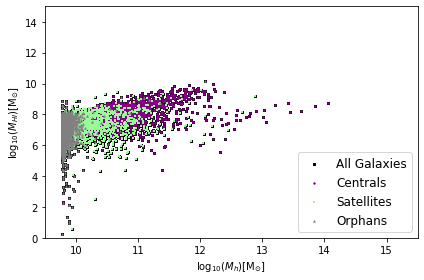

In [13]:
# Now plot the simulation for Cen, Sat and All and the Zwaan 2005 and Martin 2010 dataset on one fig
fig, ax = plt.subplots(1, 1)

label_z = ("z = " + str(redshift_used))
x = Mvir
y = HIMass
all_plt = ax.scatter(x, y, color= "black", marker= "s", s=2)  
centrals_plt = ax.scatter(x[Type==0], y[Type==0], color= "darkmagenta", marker= "o", s=2)  
satellites_plt = ax.scatter(x[Type==1], y[Type==1], color= "palegreen", marker= "+", s=2)  
orphans_plt = ax.scatter(x[Type==2], y[Type==2], color= "gray", marker= "^", s=2)  

ax.set_xlabel(r"$\log_{10}(M_{h}) [{\rm M_{\odot}}]$")
ax.set_ylabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
ax.set_ylim([0,15])
ax.set_xlim([9.5,15.5])
# Add the legend
plt.legend((all_plt, centrals_plt, satellites_plt, orphans_plt),
           ('All Galaxies', 'Centrals', 'Satellites', 'Orphans'),
           scatterpoints=1,
           loc='lower right',
           fontsize=12)

# Finally save the figure as a PDF
plt.tight_layout()

name_of_plot=("Alice_MHI_Mvir_CenSatAll" + redshift_used)
plt.savefig("plots/" + name_of_plot + ".pdf")
'''
occurrences_cen = np.count_nonzero(Type == 0)
occurrences_sat = np.count_nonzero(Type == 1)
occurrences_all = np.count_nonzero(gals)
print('Num Centrals = ', occurrences_cen)
print('Num Satellites = ', occurrences_sat)
print('Num All = ', occurrences_all)
'''

## z=1

In [6]:
# z=1 
snapshot_used_1 = 192
gals_1, sim_props_1, snaplist_1 = get_gal_catalogue(snapshot_used_1)
snaplist_index_used_1 = list(snaplist_1[0]).index(snapshot_used_1)# convert to list and find the index of the snap we are using
redshift_used_1 = snaplist_1[1][snaplist_index_used_1] # Get the redshift for corresponding snapshot
redshift_used_1 = str(round(redshift_used_1, 1)) # round float to nearest whole int
gals_ran_1 = gals_1.sample(n=10000)
gals_ran_1
# Log the masses 
HIMass_1 = np.log10(gals_ran_1["HIMass"]*1e10)
print('HIMass: ', HIMass_1, 'no. items: ', HIMass_1.shape)
Mvir_1 = np.log10(gals_ran_1["Mvir"]*1e10)
print('Mvir: ', Mvir_1, 'no. items: ', HIMass_1.shape)
Type_1 = gals_ran_1["Type"]

HIMass:  101        8.443048
1209626    7.584209
633841     7.679584
1845182        -inf
294188     7.687284
             ...   
947688     8.075882
1080576    7.467305
1041461    8.117307
350891     7.884583
1174147    8.637957
Name: HIMass, Length: 10000, dtype: float32 no. items:  (10000,)
Mvir:  101        11.008035
1209626     9.845454
633841      9.879313
1845182     9.821321
294188     10.055404
             ...    
947688     10.322576
1080576     9.845454
1041461    10.330331
350891     12.117107
1174147    10.426472
Name: Mvir, Length: 10000, dtype: float32 no. items:  (10000,)


/Users/jenkinsfamily/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


# SCATTER PLOT z=1
## All galaxies

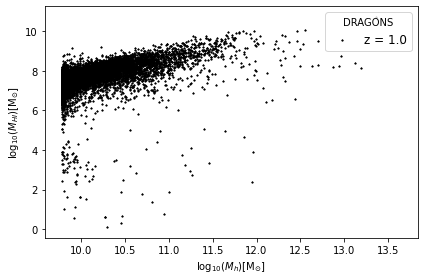

In [15]:
# Now plot the simulation for Cen, Sat and All and the Zwaan 2005 and Martin 2010 dataset on one fig
fig, ax = plt.subplots(1, 1)

label_z_1 = ("z = " + redshift_used_1)
x_1 = Mvir_1
y_1 = HIMass_1
plot = ax.scatter(x_1, y_1, color= "black", marker= "*", s=2, label=label_z_1)  

ax.set_xlabel(r"$\log_{10}(M_{h}) [{\rm M_{\odot}}]$")
ax.set_ylabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
#ax.set_ylim([0,15])
#ax.set_xlim([9.5,15.5])
# Add the legend
plt.legend(title=("DRAGONS"),
           loc='upper right',
           ncol=5,
           fontsize=12)

# Finally save the figure as a PDF
plt.tight_layout()

name_of_plot=("Alice_MHI_Mvir" + redshift_used_1)
plt.savefig("plots/" + name_of_plot + ".pdf")

## Separated galaxies: Centrals, Satellites and Orphans.

"\noccurrences_cen = np.count_nonzero(Type == 0)\noccurrences_sat = np.count_nonzero(Type == 1)\noccurrences_all = np.count_nonzero(gals)\nprint('Num Centrals = ', occurrences_cen)\nprint('Num Satellites = ', occurrences_sat)\nprint('Num All = ', occurrences_all)\n"

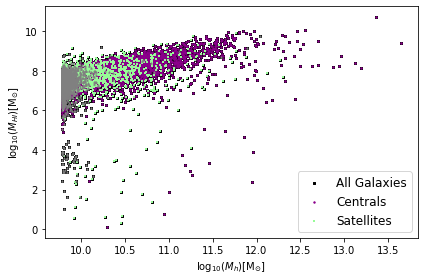

In [12]:
# Now plot the simulation for Cen, Sat and All and the Zwaan 2005 and Martin 2010 dataset on one fig
fig, ax = plt.subplots(1, 1)

label_z_1 = ("z = " + str(redshift_used_1))
x_1 = Mvir_1
y_1 = HIMass_1
all_plt_1 = ax.scatter(x_1, y_1, color= "black", marker= "s", s=2)  
centrals_plt_1 = ax.scatter(x_1[Type_1==0], y_1[Type_1==0], color= "darkmagenta", marker= "o", s=2)  
satellites_plt_1 = ax.scatter(x_1[Type_1==1], y_1[Type_1==1], color= "palegreen", marker= "+", s=2)  
orphans_plt_1 = ax.scatter(x_1[Type_1==2], y_1[Type_1==2], color= "gray", marker= "^", s=2)  

ax.set_xlabel(r"$\log_{10}(M_{h}) [{\rm M_{\odot}}]$")
ax.set_ylabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
#ax.set_ylim([0,15])
#ax.set_xlim([9.5,15.5])
# Add the legend
plt.legend((all_plt_1, centrals_plt_1, satellites_plt_1),
           ('All Galaxies', 'Centrals', 'Satellites'),
           scatterpoints=1,
           loc='lower right',
           fontsize=12)

# Finally save the figure as a PDF
plt.tight_layout()

name_of_plot=("Alice_MHI_Mvir_CenSatAll" + redshift_used_1)
plt.savefig("plots/" + name_of_plot + ".pdf")
'''
occurrences_cen = np.count_nonzero(Type == 0)
occurrences_sat = np.count_nonzero(Type == 1)
occurrences_all = np.count_nonzero(gals)
print('Num Centrals = ', occurrences_cen)
print('Num Satellites = ', occurrences_sat)
print('Num All = ', occurrences_all)
'''